In [199]:
import pandas as pd
from datetime import datetime

In [200]:
url = f"https://storage.googleapis.com/covid19-open-data/v3/location/US.csv"
usaData = pd.read_csv(url)
url2 = f"https://storage.googleapis.com/covid19-open-data/v3/location/US_TX.csv"
texasData = pd.read_csv(url2)
usaData.interpolate(inplace=True)
texasData.interpolate(inplace=True)

In [201]:
#texasData.columns

In [ ]:
#variables = list(usaData.columns)
#variables

In [ ]:
#usaData.date

In [202]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [203]:
DeadDf = usaData[['date', 'cumulative_confirmed', 'cumulative_persons_vaccinated', 'cumulative_deceased']]
cleanDeadDf = DeadDf.copy() 
cleanDeadDf = cleanDeadDf.interpolate()
cleanDeadDf.fillna(0 , inplace=True)

In [204]:
df = px.data.stocks()
fig = px.line(cleanDeadDf, x='date', y="cumulative_confirmed")
fig.show()


In [205]:
import yfinance as yf
import datetime
import time
import requests

In [206]:
start = datetime.datetime(2020,1,1)
end = datetime.datetime(2022,3,1)

In [207]:
djiaFrame = yf.download("dji",start=start, end=end, progress=False)
djiaFrame.reset_index(inplace=True)

In [208]:
sp500Frame = yf.download("^GSPC",start=start, end=end, progress=False)
sp500Frame.reset_index(inplace=True)

In [209]:
goldFrame = yf.download("GC=F",start=start, end=end, progress=False)
goldFrame.reset_index(inplace=True)

In [210]:
from pandas.plotting import register_matplotlib_converters
from matplotlib.ticker import FuncFormatter

In [211]:
xD = djiaFrame["Date"]
yD = djiaFrame["Close"]
xS = sp500Frame["Date"]
yS = sp500Frame["Close"]
xC = usaData["date"]
yC = usaData["cumulative_deceased"]

register_matplotlib_converters()
xC = pd.to_datetime(xC)

In [212]:
def millionsFormatter(x, pos):
    return f'{x / 1e6:.1f}M'

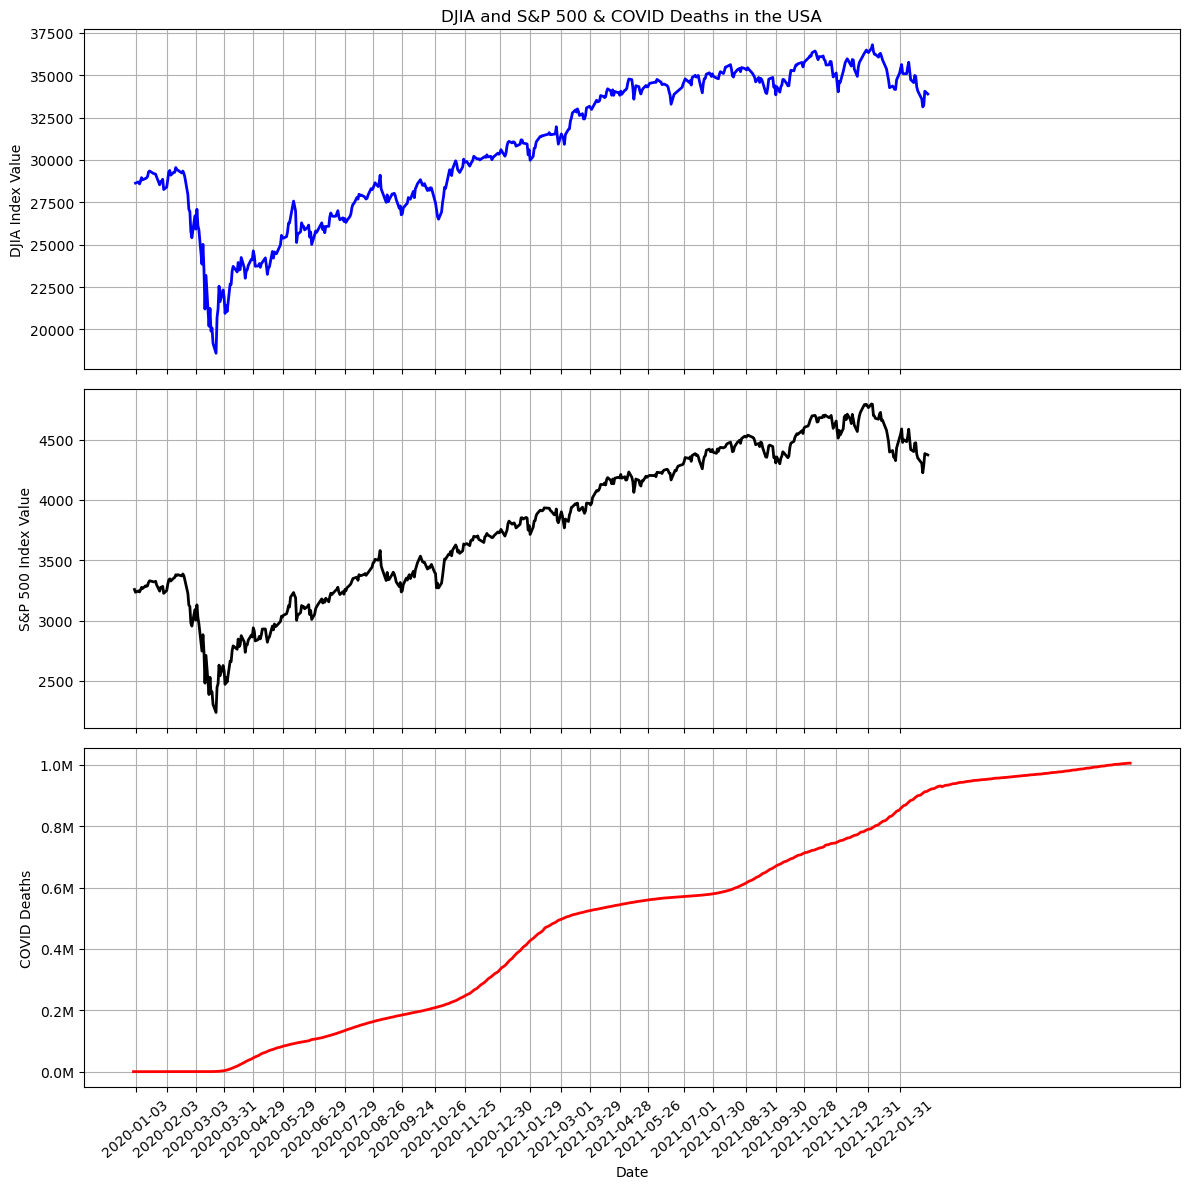

In [213]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 12), sharex=True)
ax1.plot(xD, yD, color="b", linewidth=2)
ax1.set_ylabel("DJIA Index Value", fontsize=10)
ax1.set_title("DJIA and S&P 500 & COVID Deaths in the USA", fontsize=12)
ax1.grid()

ax2.plot(xS, yS, color="k", linewidth=2)
ax2.set_ylabel("S&P 500 Index Value", fontsize=10)
ax2.grid()

ax3.plot(xC, yC, color="r", linewidth=2)
ax3.set_xlabel("Date", fontsize=10)
ax3.set_ylabel("COVID Deaths", fontsize=10)
ax3.yaxis.set_major_formatter(millionsFormatter)
ax3.grid()

plt.xticks(xD.values[::20], rotation=40)
plt.tight_layout()
plt.savefig("images/usaMarketAndDeath.png")
plt.show()

In [214]:
yC = usaData["cumulative_confirmed"]

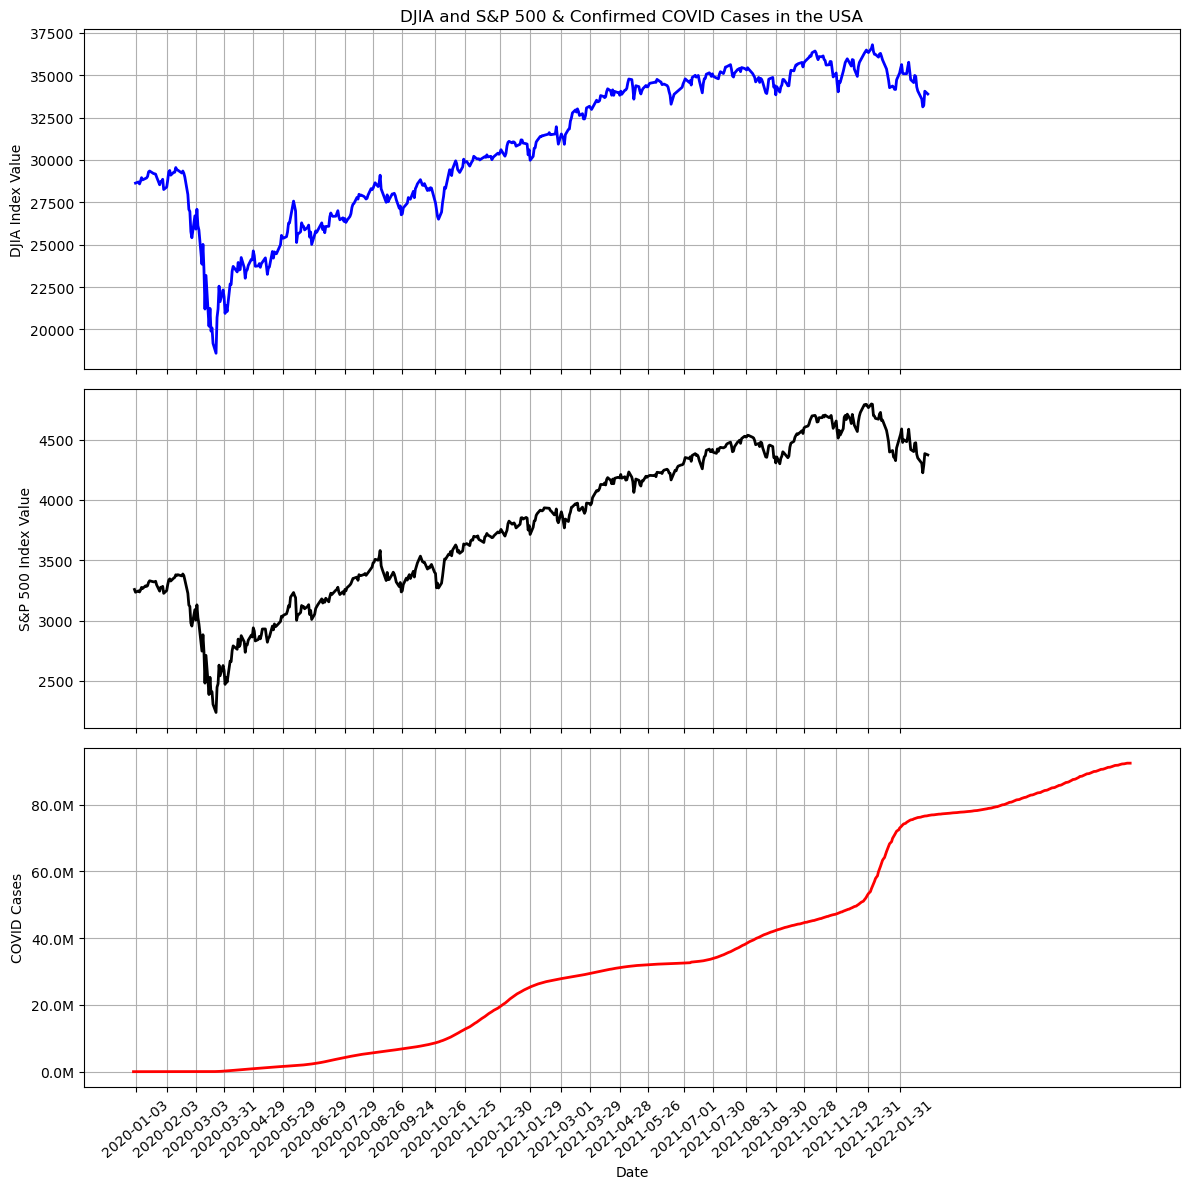

In [215]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 12), sharex=True)
ax1.plot(xD, yD, color="b", linewidth=2)
ax1.set_ylabel("DJIA Index Value", fontsize=10)
ax1.set_title("DJIA and S&P 500 & Confirmed COVID Cases in the USA", fontsize=12)
ax1.grid()

ax2.plot(xS, yS, color="k", linewidth=2)
ax2.set_ylabel("S&P 500 Index Value", fontsize=10)
ax2.grid()

ax3.plot(xC, yC, color="r", linewidth=2)
ax3.set_xlabel("Date", fontsize=10)
ax3.set_ylabel("COVID Cases", fontsize=10)
ax3.yaxis.set_major_formatter(millionsFormatter)
ax3.grid()

plt.xticks(xD.values[::20], rotation=40)
plt.tight_layout()
plt.savefig("images/usaMarketAndCases.png")
plt.show()

In [216]:
yC = usaData["cumulative_persons_vaccinated"]

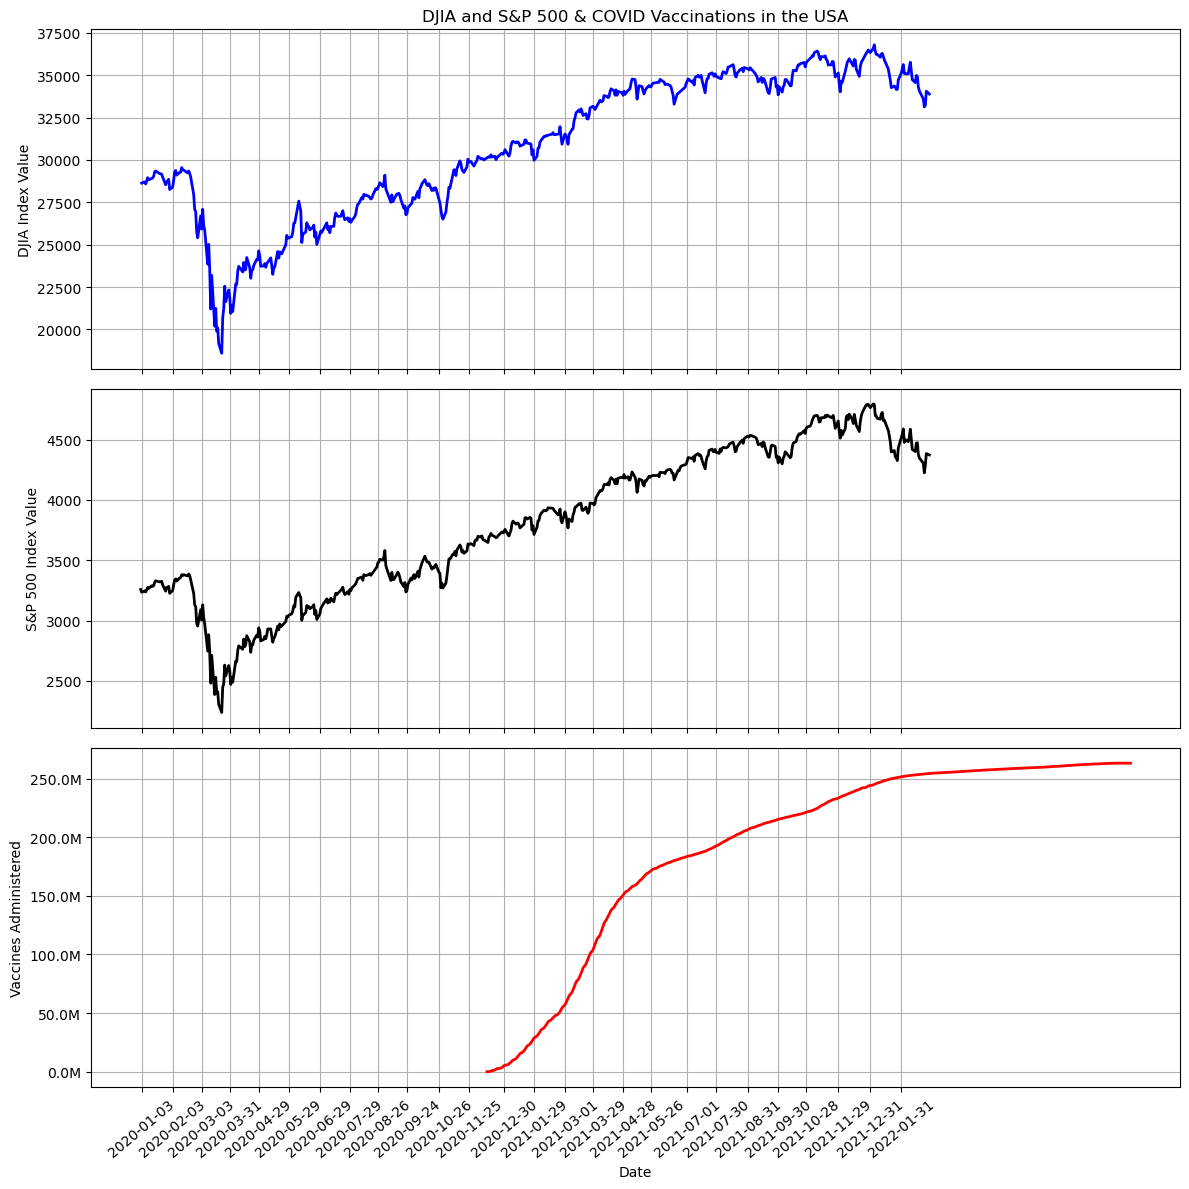

In [217]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 12), sharex=True)
ax1.plot(xD, yD, color="b", linewidth=2)
ax1.set_ylabel("DJIA Index Value", fontsize=10)
ax1.set_title("DJIA and S&P 500 & COVID Vaccinations in the USA", fontsize=12)
ax1.grid()

ax2.plot(xS, yS, color="k", linewidth=2)
ax2.set_ylabel("S&P 500 Index Value", fontsize=10)
ax2.grid()

ax3.plot(xC, yC, color="r", linewidth=2)
ax3.set_xlabel("Date", fontsize=10)
ax3.set_ylabel("Vaccines Administered", fontsize=10)
ax3.yaxis.set_major_formatter(millionsFormatter)
ax3.grid()

plt.xticks(xD.values[::20], rotation=40)
plt.tight_layout()
plt.savefig("images/usaMarketAndVac.png")
plt.show()

In [218]:
xC = texasData["date"]
yC = texasData["cumulative_deceased"]

register_matplotlib_converters()
xC = pd.to_datetime(xC)

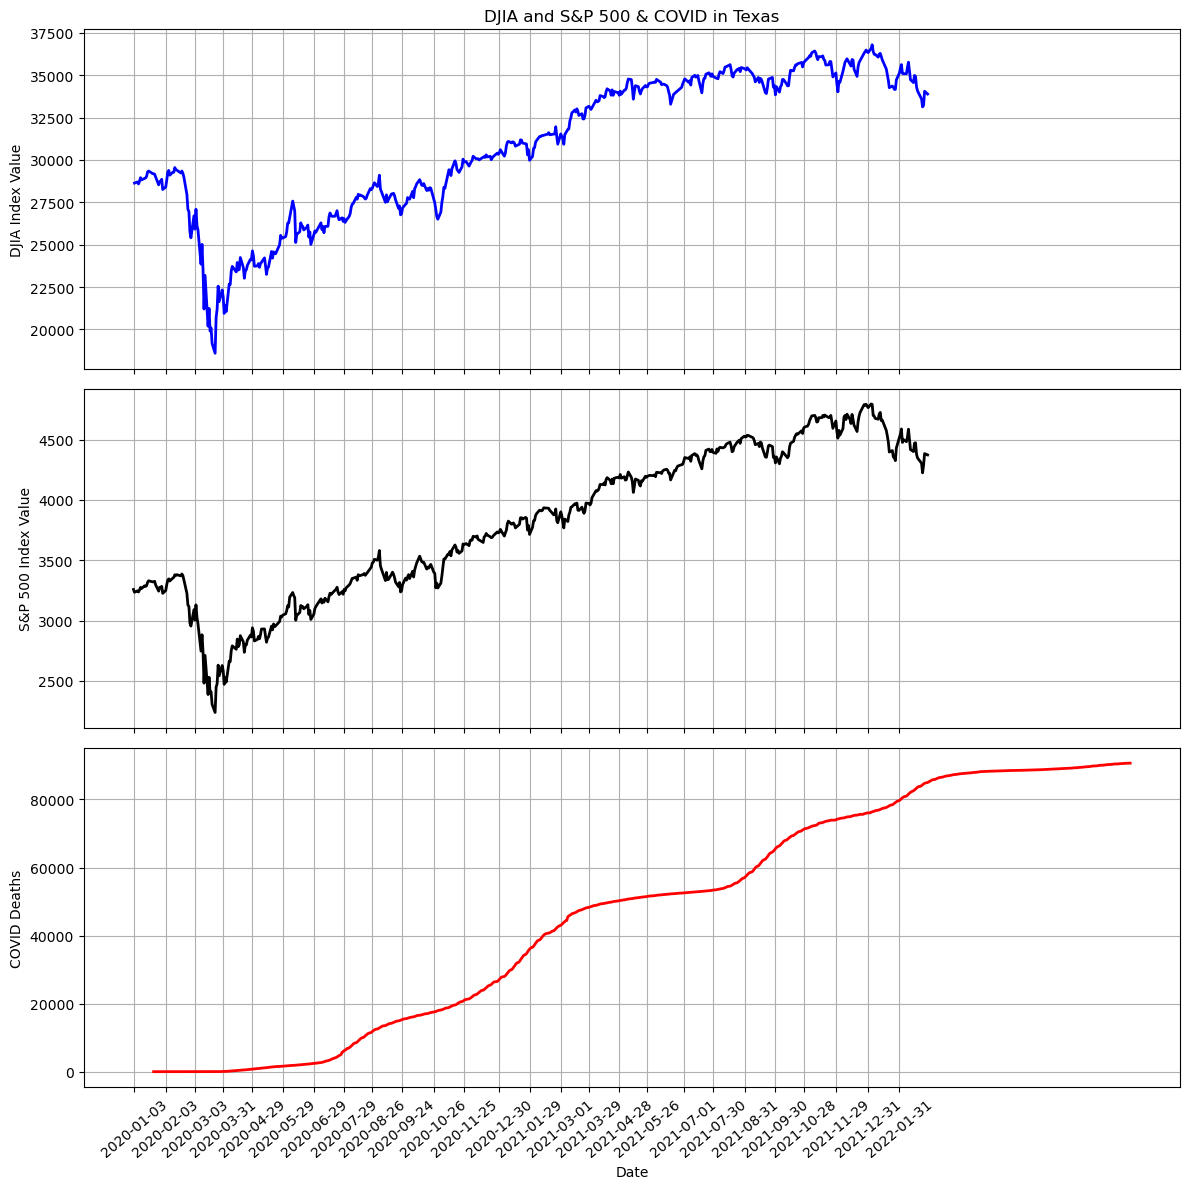

In [219]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 12), sharex=True)
ax1.plot(xD, yD, color="b", linewidth=2)
ax1.set_ylabel("DJIA Index Value", fontsize=10)
ax1.set_title("DJIA and S&P 500 & COVID in Texas", fontsize=12)
ax1.grid()

ax2.plot(xS, yS, color="k", linewidth=2)
ax2.set_ylabel("S&P 500 Index Value", fontsize=10)
ax2.grid()

ax3.plot(xC, yC, color="r", linewidth=2)
ax3.set_xlabel("Date", fontsize=10)
ax3.set_ylabel("COVID Deaths", fontsize=10)
ax3.grid()

plt.xticks(xD.values[::20], rotation=40)
plt.tight_layout()
plt.savefig("images/texasMarketAndDeaths.png")
plt.show()

In [220]:
yC = texasData["cumulative_persons_vaccinated"]

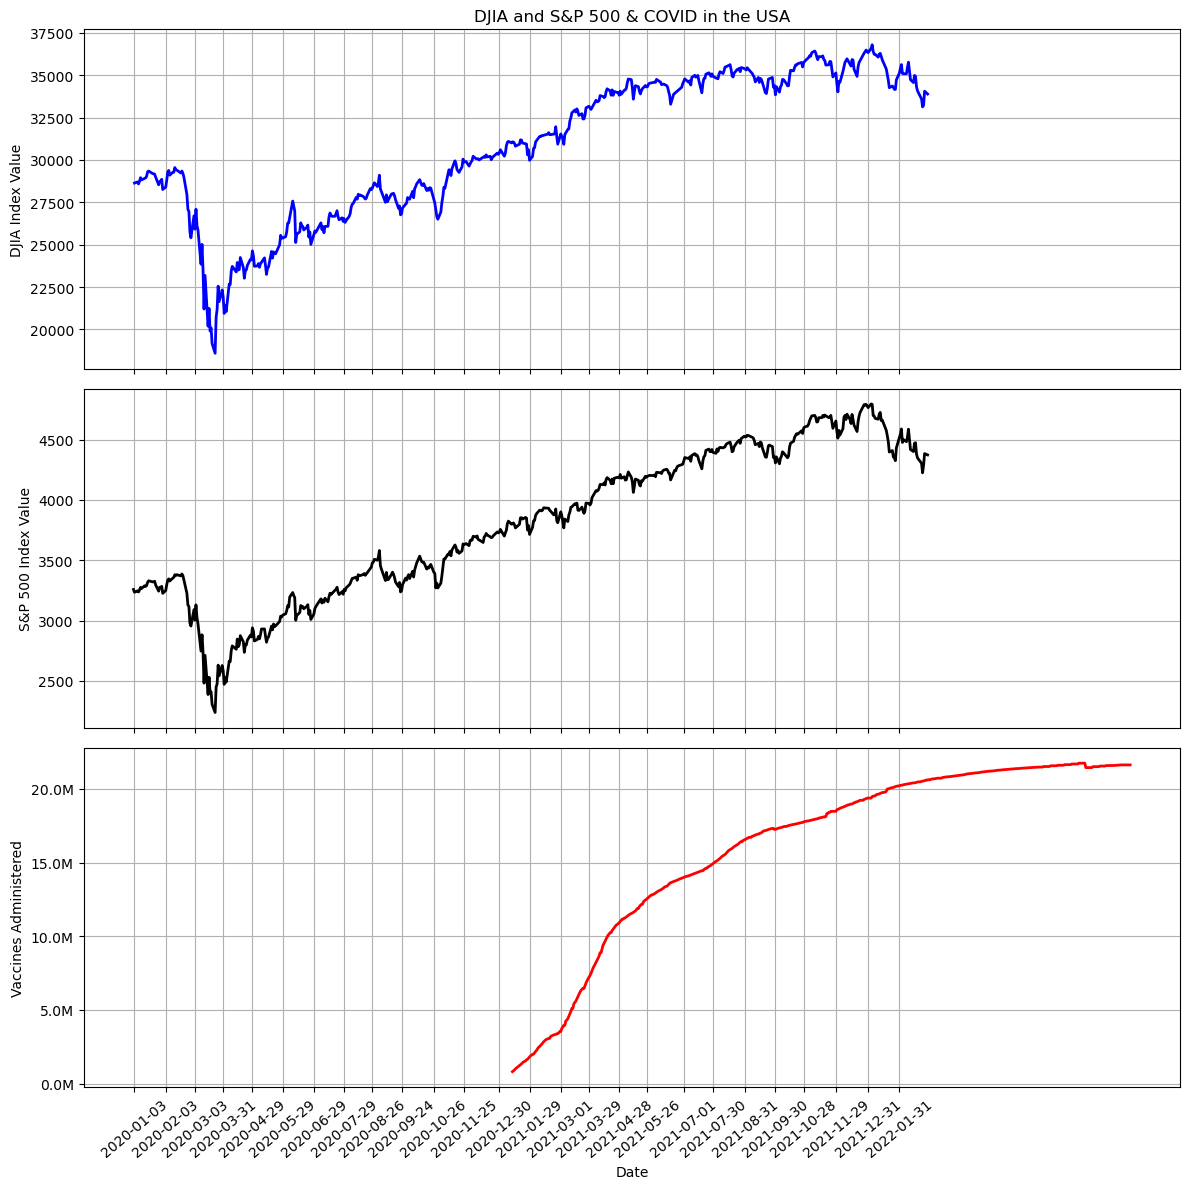

In [221]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 12), sharex=True)
ax1.plot(xD, yD, color="b", linewidth=2)
ax1.set_ylabel("DJIA Index Value", fontsize=10)
ax1.set_title("DJIA and S&P 500 & COVID in the USA", fontsize=12)
ax1.grid()

ax2.plot(xS, yS, color="k", linewidth=2)
ax2.set_ylabel("S&P 500 Index Value", fontsize=10)
ax2.grid()

ax3.plot(xC, yC, color="r", linewidth=2)
ax3.set_xlabel("Date", fontsize=10)
ax3.set_ylabel("Vaccines Administered", fontsize=10)
ax3.yaxis.set_major_formatter(millionsFormatter)
ax3.grid()

plt.xticks(xD.values[::20], rotation=40)
plt.tight_layout()
plt.savefig("images/texasMarketAndVac.png")
plt.show()

In [222]:
yC = texasData["cumulative_persons_vaccinated"]
xG = goldFrame["Date"]
yG = goldFrame["Close"]

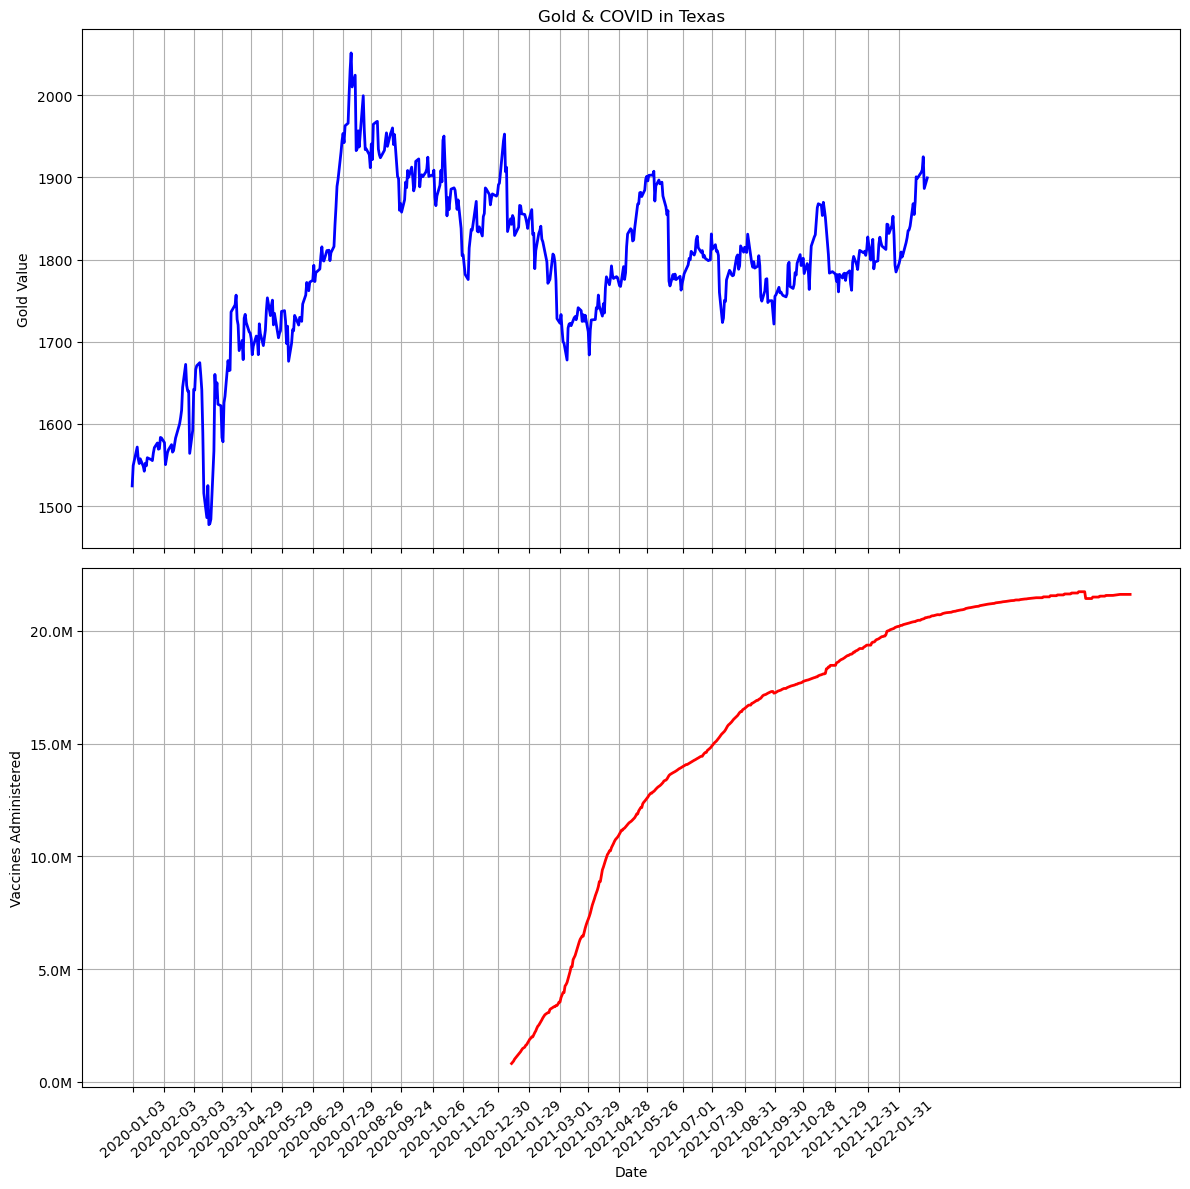

In [223]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), sharex=True)
ax1.plot(xG, yG, color="b", linewidth=2)
ax1.set_ylabel("Gold Value", fontsize=10)
ax1.set_title("Gold & COVID in Texas", fontsize=12)
ax1.grid()

ax2.plot(xC, yC, color="r", linewidth=2)
ax2.set_xlabel("Date", fontsize=10)
ax2.set_ylabel("Vaccines Administered", fontsize=10)
ax2.yaxis.set_major_formatter(millionsFormatter)
ax2.grid()

plt.xticks(xD.values[::20], rotation=40)
plt.tight_layout()
plt.savefig("images/texasGoldAndVac.png")
plt.show()

In [224]:
yC = usaData["cumulative_deceased"]
xG = goldFrame["Date"]
yG = goldFrame["Close"]

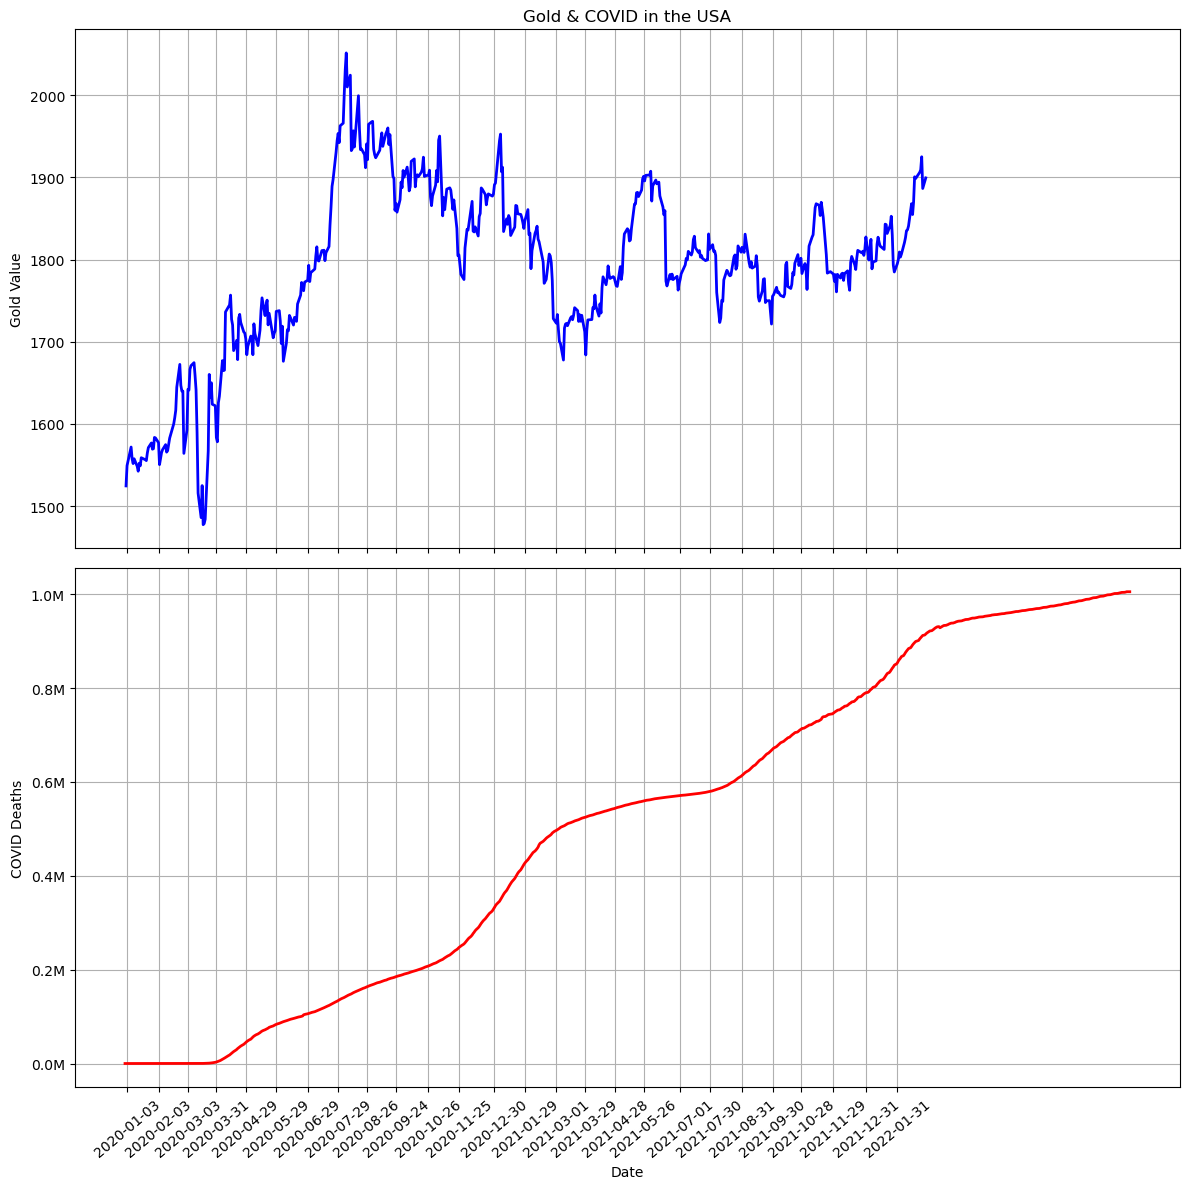

In [225]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), sharex=True)
ax1.plot(xG, yG, color="b", linewidth=2)
ax1.set_ylabel("Gold Value", fontsize=10)
ax1.set_title("Gold & COVID in the USA", fontsize=12)
ax1.grid()

ax2.plot(xC, yC, color="r", linewidth=2)
ax2.set_xlabel("Date", fontsize=10)
ax2.set_ylabel("COVID Deaths", fontsize=10)
ax2.yaxis.set_major_formatter(millionsFormatter)
ax2.grid()

plt.xticks(xD.values[::20], rotation=40)
plt.tight_layout()
plt.savefig("images/usaGoldAndVac.png")
plt.show()

In [226]:
texasUDataLoad = pd.read_csv("data/txu.csv")
texasUData = texasUDataLoad[texasUDataLoad['Date'].str.endswith(('20', '21', '22'))]
yC = texasData["cumulative_persons_vaccinated"]
xT = texasUData["Date"]
yT = texasUData["Unemployment Rate"]
xT = pd.to_datetime(xT)

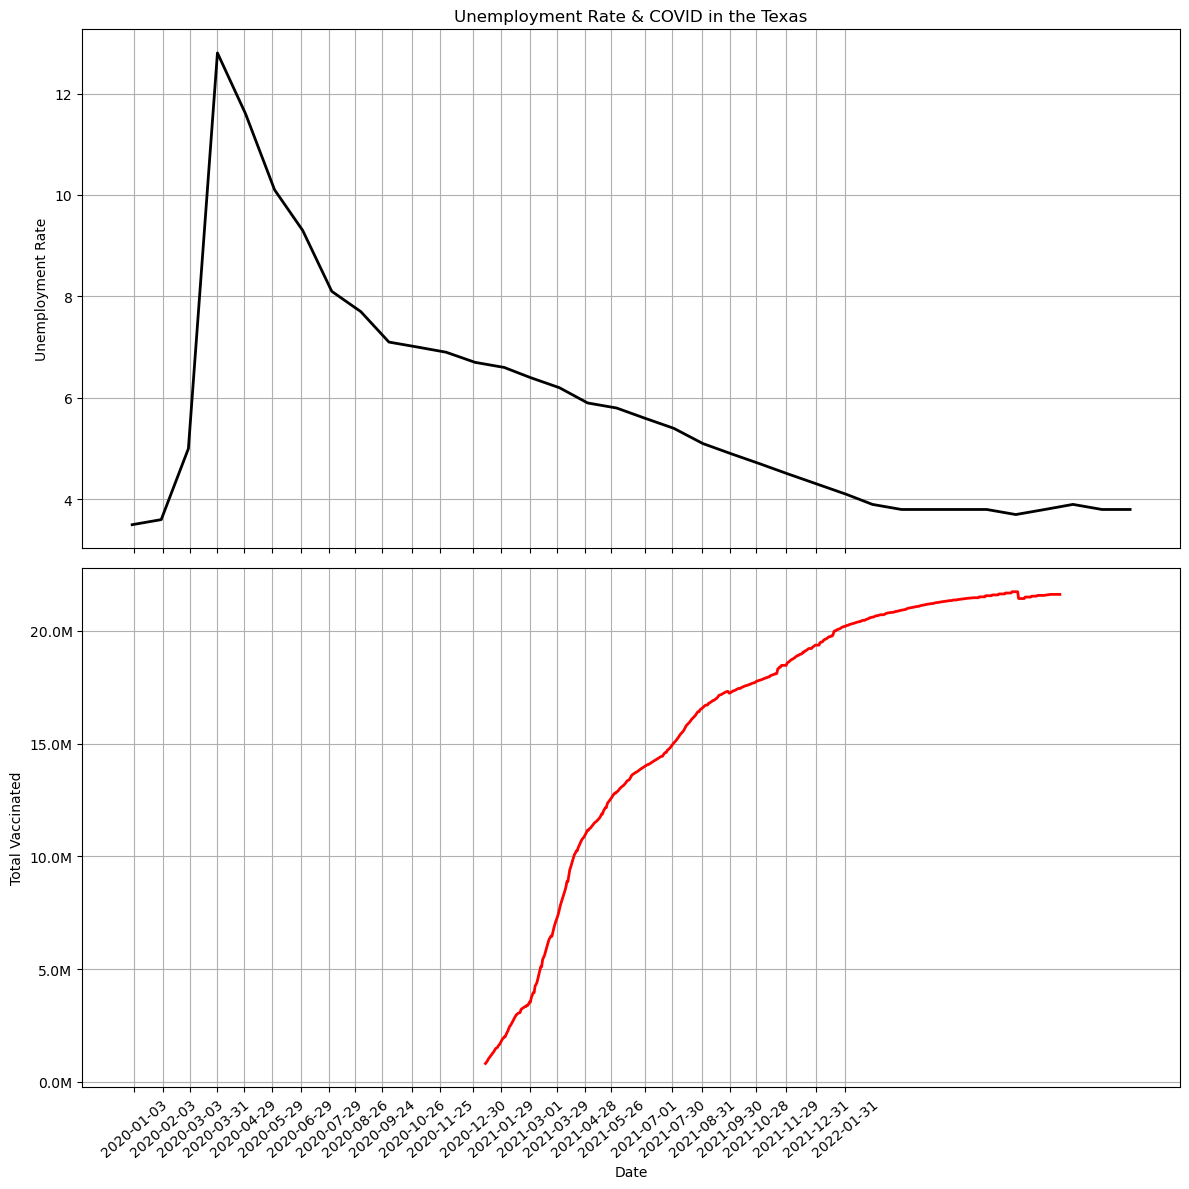

In [227]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), sharex=True)
ax1.plot(xT, yT, color="k", linewidth=2)
ax1.set_ylabel("Unemployment Rate", fontsize=10)
ax1.set_title("Unemployment Rate & COVID in the Texas", fontsize=12)
ax1.grid()

ax2.plot(xC, yC, color="r", linewidth=2)
ax2.set_xlabel("Date", fontsize=10)
ax2.set_ylabel("Total Vaccinated", fontsize=10)
ax2.yaxis.set_major_formatter(millionsFormatter)
ax2.grid()

plt.xticks(xD.values[::20], rotation=40)
plt.tight_layout()
plt.savefig("images/texasUnempVac.png")
plt.show()

In [228]:
yC = texasData["cumulative_deceased"]

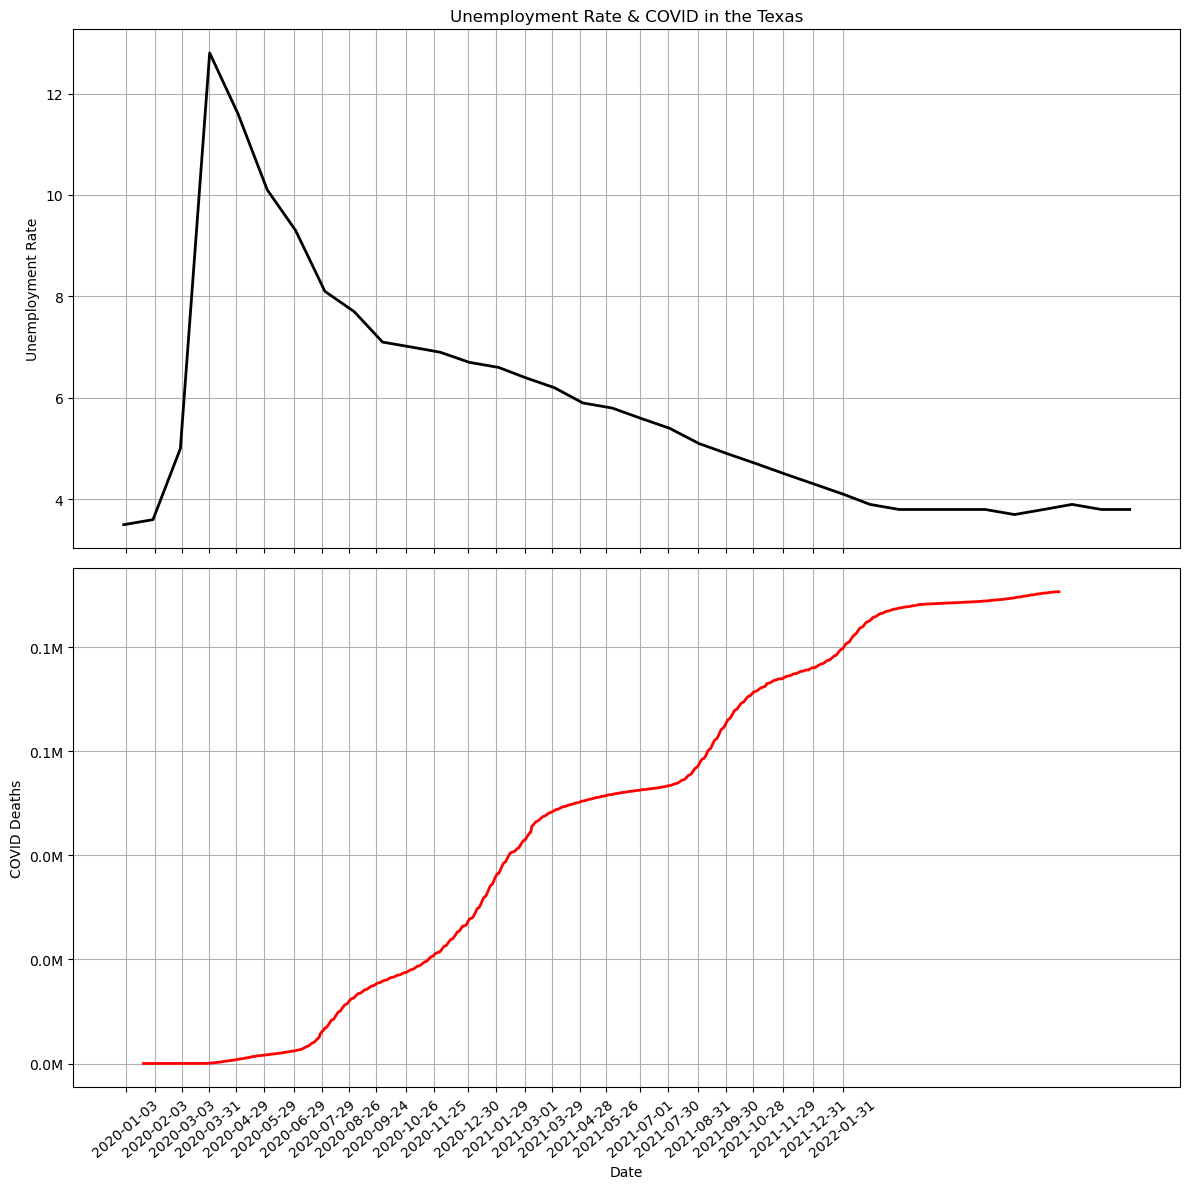

In [229]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), sharex=True)
ax1.plot(xT, yT, color="k", linewidth=2)
ax1.set_ylabel("Unemployment Rate", fontsize=10)
ax1.set_title("Unemployment Rate & COVID in the Texas", fontsize=12)
ax1.grid()

ax2.plot(xC, yC, color="r", linewidth=2)
ax2.set_xlabel("Date", fontsize=10)
ax2.set_ylabel("COVID Deaths", fontsize=10)
ax2.yaxis.set_major_formatter(millionsFormatter)
ax2.grid()

plt.xticks(xD.values[::20], rotation=40)
plt.tight_layout()
plt.savefig("images/texasUnempDeaths.png")
plt.show()

In [230]:
usaUDataLoad = pd.read_csv("data/usaunemployment.csv")
#usaUDataLoad

In [231]:
#usaUDataLoad.columns

In [232]:
yUu = usaUDataLoad["Unemployment Rate"][1:29]
xUu = usaUDataLoad["Year"][1:29]
yC = usaData["cumulative_deceased"]

In [233]:
xUu = pd.to_datetime(xUu)

In [234]:
min_length = min(len(xUu), len(xD))
xUu = xUu[:min_length]
xD = xD[:min_length]

min_length = min(len(yUu), len(yD))
yUu = yUu[:min_length]
yD = yD[:min_length]


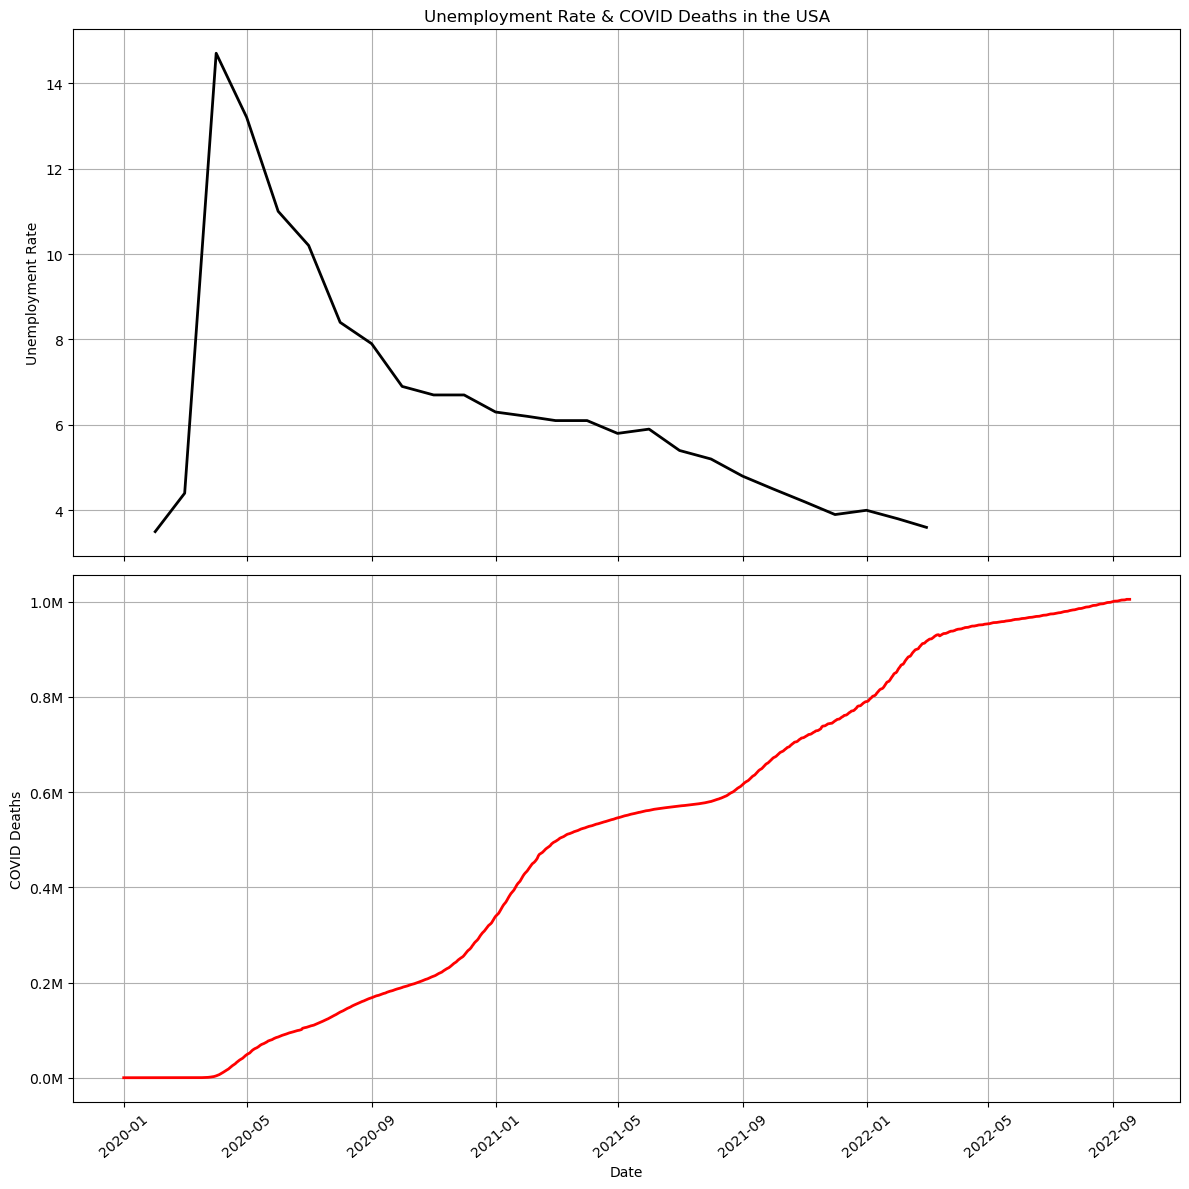

In [235]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12, 12), sharex=True)
ax1.plot(xUu, yUu, color="k", linewidth=2)
ax1.set_ylabel("Unemployment Rate", fontsize=10)
ax1.set_title("Unemployment Rate & COVID Deaths in the USA", fontsize=12)
ax1.grid()

ax2.plot(xC, yC, color="r", linewidth=2)
ax2.set_xlabel("Date", fontsize=10)
ax2.set_ylabel("COVID Deaths", fontsize=10)
ax2.yaxis.set_major_formatter(millionsFormatter)
ax2.grid()

plt.xticks(rotation=40)
plt.tight_layout()
plt.savefig("images/usaUnemploymentAndDeath.png")
plt.show()

In [236]:
yC = usaData["cumulative_persons_vaccinated"]

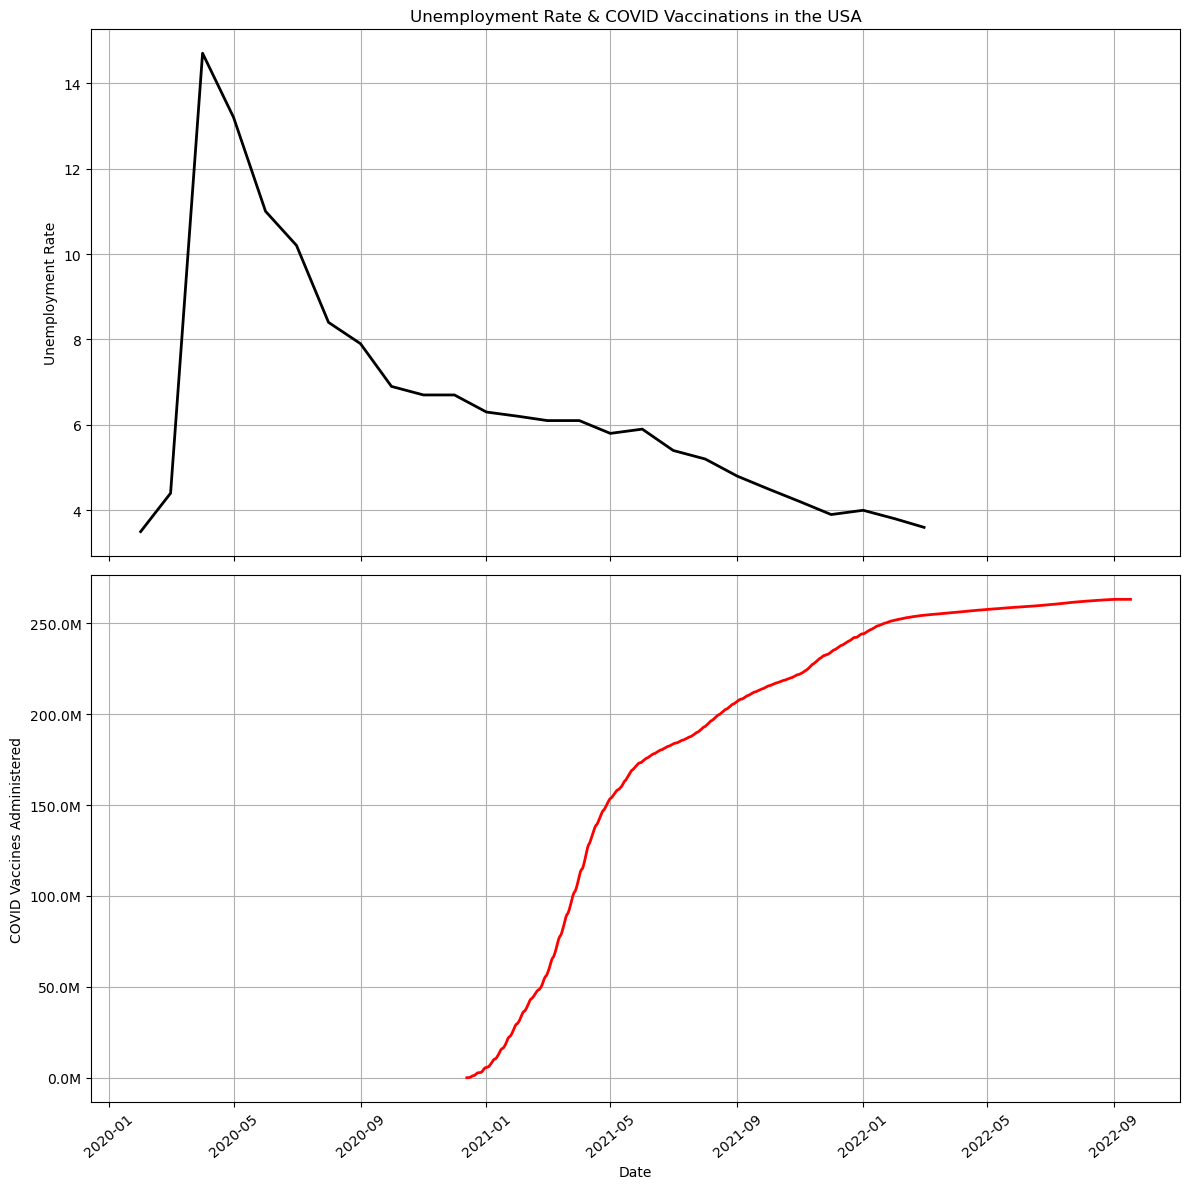

In [237]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12, 12), sharex=True)
ax1.plot(xUu, yUu, color="k", linewidth=2)
ax1.set_ylabel("Unemployment Rate", fontsize=10)
ax1.set_title("Unemployment Rate & COVID Vaccinations in the USA", fontsize=12)
ax1.grid()

ax2.plot(xC, yC, color="r", linewidth=2)
ax2.set_xlabel("Date", fontsize=10)
ax2.set_ylabel("COVID Vaccines Administered", fontsize=10)
ax2.yaxis.set_major_formatter(millionsFormatter)

ax2.grid()

plt.xticks(rotation=40)
plt.tight_layout()
plt.savefig("images/usaUnemploymentAndVacc.png")
plt.show()

In [238]:
yC = usaData["cumulative_confirmed"]

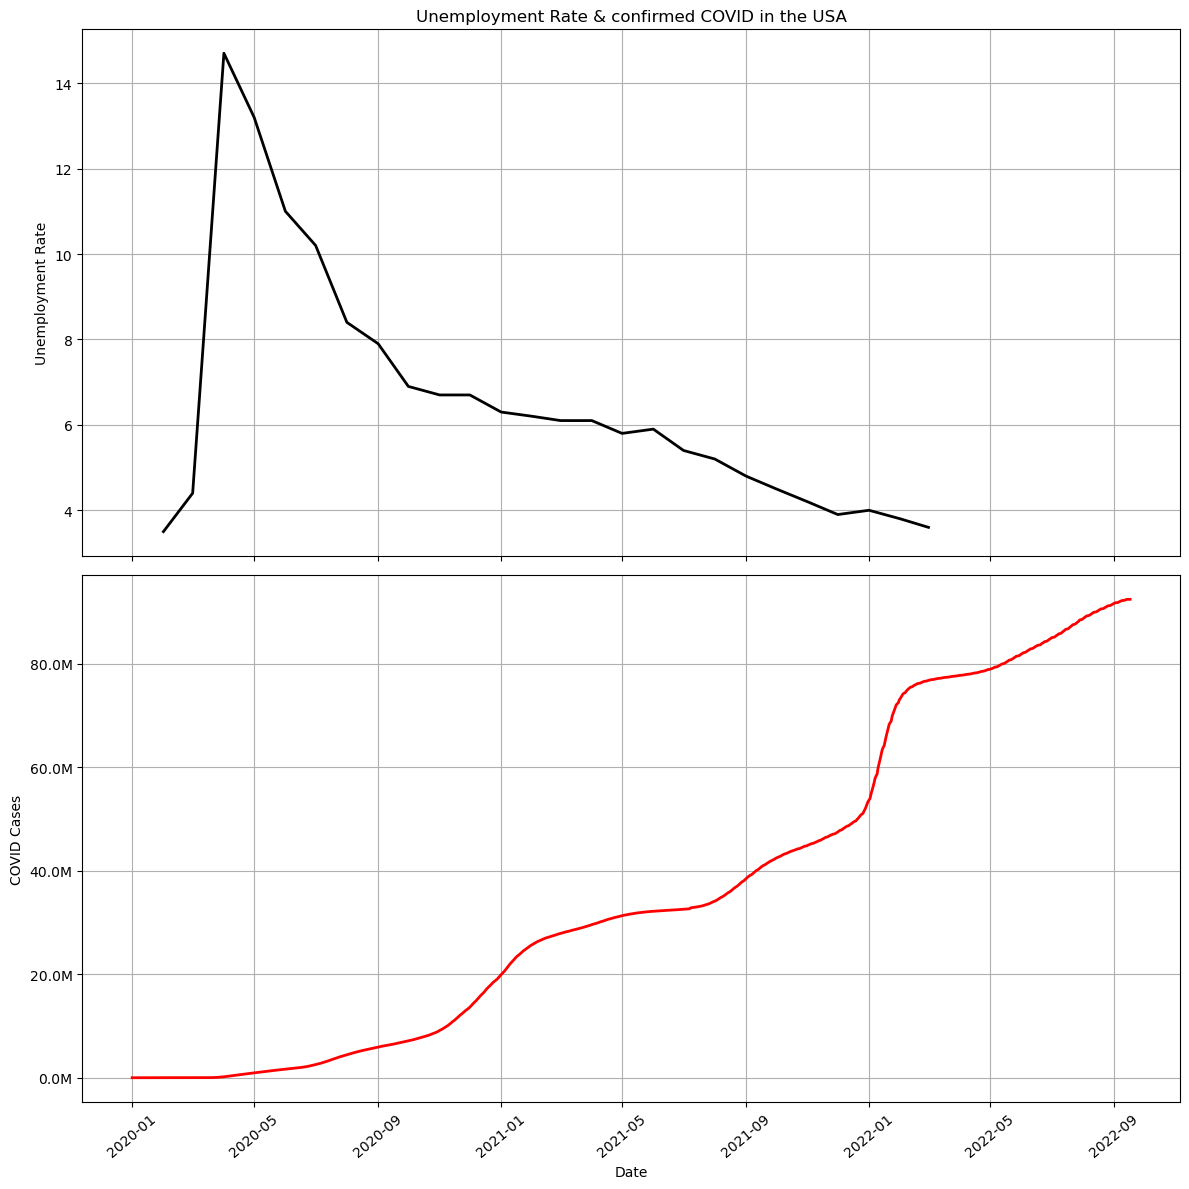

In [239]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12, 12), sharex=True)
ax1.plot(xUu, yUu, color="k", linewidth=2)
ax1.set_ylabel("Unemployment Rate", fontsize=10)
ax1.set_title("Unemployment Rate & confirmed COVID in the USA", fontsize=12)
ax1.grid()

ax2.plot(xC, yC, color="r", linewidth=2)
ax2.set_xlabel("Date", fontsize=10)
ax2.set_ylabel("COVID Cases", fontsize=10)
ax2.yaxis.set_major_formatter(millionsFormatter)

ax2.grid()

plt.xticks(rotation=40)
plt.tight_layout()
plt.savefig("images/usaUnemploymentAndCases.png")
plt.show()